# PyQuil example: Ripple adder
Based on Cuccaro, Draper, Kutin & Moulton (2008).

* Gines Carrascal, Complutense University of Madrid

https://github.com/gines-carrascal/jupyter-pyquil

In [1]:
from pyquil import get_qc, Program
from pyquil.gates import X, CNOT, CCNOT, MEASURE
from pyquil.latex import to_latex, display
from pyquil.quil import address_qubits
from pyquil.quilatom import QubitPlaceholder

In [2]:
sumando_1 = input("Primer sumando en binario (4 bits)")
sumando_2 = input("Segundo sumando en binario(4 bits)")

Primer sumando en binario (4 bits)0001
Segundo sumando en binario(4 bits)0001


In [3]:
n = 4

p = Program()


a = QubitPlaceholder.register(n)
b = QubitPlaceholder.register(n+1)
c = QubitPlaceholder.register(1)

ro = p.declare('ro', 'BIT', n+1)

for i in range(n):
    if sumando_1[i] == "1":
        p += X(a[n - (i+1)])
for i in range(n):
    if sumando_2[i] == "1":
        p += X(b[n - (i+1)])

for i in range(1, n):
    p += CNOT(a[i], b[i])

p += CNOT(a[1], c[0])

p += CCNOT(a[0], b[0], c[0])
p += CNOT(a[2], a[1])

p += CCNOT(c[0], b[1], a[1])
p += CNOT(a[3], a[2])

for i in range(2, n-2):
    p += CCNOT(a[i-1], b[i], a[i])
    p += CNOT(a[i+2], a[i+1])

p += CCNOT(a[n-3], b[n-2], a[n-2])
p += CNOT(a[n-1], b[n])

p += CCNOT(a[n-2], b[n-1], b[n])
for i in range(1, n-1):
    p += X(b[i])

p += CNOT(c[0], b[1])
for i in range(2, n):
    p += CNOT(a[i-1], b[i])

p += CCNOT(a[n-3], b[n-2], a[n-2])

for i in range(n-3,1,-1):
    p += CCNOT(a[i-1], b[i], a[i])
    p += CNOT(a[i+2], a[i+1])
    p += X(b[i+1])

p += CCNOT(c[0], b[1], a[1])
p += CNOT(a[3], a[2])
p += X(b[2])

p += CCNOT(a[0], b[0], c[0])
p += CNOT(a[2], a[1])
p += X(b[1])

p += CNOT(a[1], c[0])

for i in range(n):
    p += CNOT(a[i], b[i])        
    
for i in range(n+1):
    p += MEASURE(b[i], ro[i])

p.wrap_in_numshots_loop(20)

print(address_qubits(p)) 

DECLARE ro BIT[5]
X 0
X 1
CNOT 2 3
CNOT 4 5
CNOT 6 7
CNOT 2 8
CCNOT 0 1 8
CNOT 4 2
CCNOT 8 3 2
CNOT 6 4
CCNOT 2 5 4
CNOT 6 9
CCNOT 4 7 9
X 3
X 5
CNOT 8 3
CNOT 2 5
CNOT 4 7
CCNOT 2 5 4
CCNOT 8 3 2
CNOT 6 4
X 5
CCNOT 0 1 8
CNOT 4 2
X 3
CNOT 2 8
CNOT 0 1
CNOT 2 3
CNOT 4 5
CNOT 6 7
MEASURE 1 ro[0]
MEASURE 3 ro[1]
MEASURE 5 ro[2]
MEASURE 7 ro[3]
MEASURE 9 ro[4]



In [4]:
from pyquil import list_quantum_computers
print(list_quantum_computers())

['Aspen-7-28Q-A', 'Aspen-7-14Q-C', 'Aspen-7-13Q-C', 'Aspen-4-13Q-E', 'Aspen-7-12Q-C', 'Aspen-7-11Q-C', 'Aspen-7-10Q-C', 'Aspen-4-9Q-E', 'Aspen-7-9Q-C', 'Aspen-7-8Q-C', 'Aspen-4-8Q-F', 'Aspen-4-7Q-F', 'Aspen-7-7Q-C', 'Aspen-7-6Q-C', 'Aspen-4-6Q-F', 'Aspen-7-5Q-C', 'Aspen-4-5Q-E', 'Aspen-7-4Q-D', 'Aspen-4-4Q-D', 'Aspen-4-4Q-F', 'Aspen-7-3Q-C', 'Aspen-4-3Q-F', 'Aspen-4-3Q-G', 'Aspen-7-2Q-C', 'Aspen-4-2Q-C', 'Aspen-4-2Q-H', '9q-square-qvm', '9q-square-noisy-qvm']


In [5]:
#qvm = get_qc(str(2*n+1)+"q-qvm")

qvm = get_qc("Aspen-7-28Q-A", as_qvm=True)

In [6]:
cp = qvm.compile(address_qubits(p),protoquil=True)

In [7]:
print(cp.program)

DECLARE ro BIT[5]
RZ(-pi/2) 35
RX(pi/2) 35
CZ 35 36
RZ(-pi/2) 37
RX(pi/2) 37
CZ 30 37
RZ(0.8021175320660274) 31
RX(-pi/2) 31
RZ(-pi/2) 32
RX(-pi/2) 32
RZ(-2.70479961859648) 32
RX(pi/2) 32
CZ 32 31
RZ(pi) 31
RX(pi/2) 31
RZ(pi) 32
RX(pi/2) 32
CZ 32 31
RZ(-pi/2) 33
RX(pi/2) 33
RZ(pi/2) 33
RX(pi/2) 30
RZ(-2.6409882416879435) 30
RX(-pi/2) 30
RZ(-1.0086266227343406) 30
RX(pi/2) 30
RZ(-1.5456902995042536) 30
RX(-pi/2) 30
RX(pi/2) 31
RZ(2.8223096546435205) 31
RX(-pi/2) 31
RZ(-2.50816954688591) 31
RX(pi/2) 31
RZ(1.2297283971578503) 31
RX(-pi/2) 31
CZ 31 30
RZ(-pi/2) 30
RX(pi/2) 30
RZ(-pi/2) 31
RX(-pi/2) 31
CZ 31 30
RX(-pi/2) 30
RX(pi/2) 31
CZ 31 30
RX(pi/2) 32
RZ(-0.8021175320660276) 32
CZ 33 32
RX(pi/2) 33
RZ(-1.0390229563058004) 33
RX(-pi/2) 33
RZ(-0.6077091372599673) 33
RX(pi/2) 33
RZ(2.854524379659763) 33
RX(-pi/2) 33
RZ(pi) 34
RX(pi/2) 34
RZ(-2.391093596412876) 34
RX(-pi/2) 34
RZ(-0.806123519645149) 34
RX(pi/2) 34
RZ(-1.8093512680020893) 34
RX(-pi/2) 34
CZ 34 33
RZ(-pi/2) 33
RX(pi/2) 33
RZ

In [8]:
print(cp.attributes)

{'native_quil_metadata': NativeQuilMetadata(final_rewiring=[13, 14, 36, 35, 30, 31, 33, 32, 22, 34,...], gate_depth=836, gate_volume=2396, multiqubit_gate_depth=157, program_duration=50402.98000000007, program_fidelity=0.2124826078425144, qpu_runtime_estimation=4101.681640625, topological_swaps=65), 'num_shots': 20}


In [9]:
print(len(cp.attributes['native_quil_metadata'].final_rewiring))

38


In [10]:
qvm = get_qc("Aspen-7-14Q-C", as_qvm=True)
cp = qvm.compile(address_qubits(p),protoquil=True)
print(cp.attributes)

{'native_quil_metadata': NativeQuilMetadata(final_rewiring=[13, 12, 17, 10, 1, 0, 14, 25, 16, 11,...], gate_depth=610, gate_volume=1783, multiqubit_gate_depth=113, program_duration=36502.18999999989, program_fidelity=0.26822255023901503, qpu_runtime_estimation=3099.78466796875, topological_swaps=46), 'num_shots': 20}


In [11]:
qvm.run(cp)

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [12]:
display(cp, width=300)

AttributeError: 'PyQuilExecutableResponse' object has no attribute 'get_qubits'

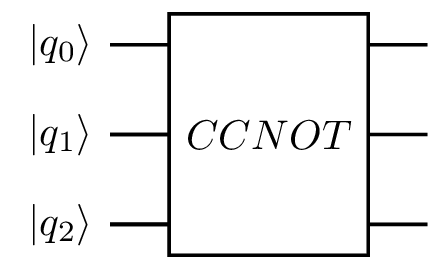

In [13]:
from pyquil.gates import CCNOT
p = Program()
p += CCNOT(0,1,2)
display(p, width=300)